In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import acquire
import prepare
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from io import StringIO
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Exercise

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
#acquire data
df = acquire.get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
df.shape

(891, 13)

In [5]:
#split data
train, validate, test = prepare.prep_titanic_data(df, column = 'age', method = 'median', dummies = ['embarked', 'sex'])


In [6]:
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

In [7]:
train.head(1)

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male
583,583,0,1,36.0,0,0,40.125,1,0,0,1


In [8]:
# drop out non-numerical columns or non-encoded version remaining in this data set.
#in this case, it is only 'passaner_id'
train.drop(columns = ['passenger_id'], inplace=True)
validate.drop(columns = ['passenger_id'], inplace=True)
test.drop(columns = ['passenger_id'], inplace=True)

In [9]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [10]:
train.head(2)

,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male
583,0,1,36.0,0,0,40.125,1,0,0,1
165,1,3,9.0,0,2,20.525,0,0,1,1


In [11]:
# We will be attempting to make a Decision Tree Classifier Model that will predict survival on the 
# Titanic that performs better than the baseline

In [12]:
# we are working with survided. The most prevelant class in the training dataset (the mode)
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [13]:
train.survived.mode()

0    0
dtype: int64

In [14]:
#so the baselined is survived = 0
train['baseline'] = 0

In [15]:
#accuracy
(train.baseline == train.survived).mean()

0.6164658634538153

In [16]:
print(f'The baseline accuracy for nonsurvival in all cases on the Titanic Dataset is {(train.baseline == train.survived).mean():.3}')

The baseline accuracy for nonsurvival in all cases on the Titanic Dataset is 0.616


In [17]:
# classification report of baseline model
baseline_class_report = classification_report(train.survived, train.baseline, zero_division=True)
print(baseline_class_report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       1.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.81      0.50      0.38       498
weighted avg       0.76      0.62      0.47       498



In [ ]:
#other way to check the accuracy of baseline
#split 
X_train, y_train = train.drop(columns='survived'), train.survived
#as the baseline mode is = 0 , thats why we put constant = 0
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)

In [ ]:
print(f'Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [18]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male,baseline
583,0,1,36.0,0,0,40.125,1,0,0,1,0


In [19]:
# remove baseline assumption from the train, we wont need this column anymore
train.drop(columns='baseline', inplace=True)

In [20]:
# split our X and y
# do the capital X, lowercase y thing for train test and split
# X is the data frame of the features, y is a series of the target
X_train = train.drop(columns='survived')
y_train = train[['survived']]
X_validate, y_validate = validate.drop(columns='survived'), validate['survived']
X_test, y_test = test.drop(columns='survived'), test['survived']

In [ ]:
# #other way to do the split is decide wich columns we are going to use
# X_cols = [ 'pclass','age', 'sex_male','alone', 'embarked_Q', 'embarked_S']
# y_col = 'survived'

# X_train, y_train = train[X_cols], train[y_col]
# X_train, y_train = train[X_cols], train[y_col]
# X_validate, y_validate = validate[X_cols], validate[y_col]
# X_test, y_test = test[X_cols], test[y_col]

In [21]:
X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male
583,1,36.0,0,0,40.125,1,0,0,1


In [22]:
y_train.head(1)

,survived
583,0


In [23]:
X_train.shape, y_train.shape

((498, 9), (498, 1))

In [24]:
# create the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
#calculate the accuracy
acc = model.score(X_train, y_train)
acc

0.9939759036144579

In [26]:

# look at the model scores for training set and validate set
print(f'training score: {model.score(X_train, y_train):.2%}')
print(f'validate score: {model.score(X_validate, y_validate):.2%}')

training score: 99.40%
validate score: 80.37%


[Text(599.9923469387755, 631.9350000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(189.17908163265307, 591.1650000000001, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = survived'),
 Text(54.66122448979592, 550.395, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = survived'),
 Text(40.99591836734694, 509.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = died'),
 Text(68.3265306122449, 509.625, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = survived'),
 Text(54.66122448979592, 468.855, 'fare <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = survived'),
 Text(40.99591836734694, 428.08500000000004, 'age <= 27.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]\nclass = survived'),
 Text(27.33061224489796, 387.31500000000005, 'age <= 23.5\ngini = 0.208\nsamples = 17\nvalue = [2, 15]\nclass = survived'),
 Text(13.66530612244898, 346.545, 'gini = 0.0\nsamples = 10\n

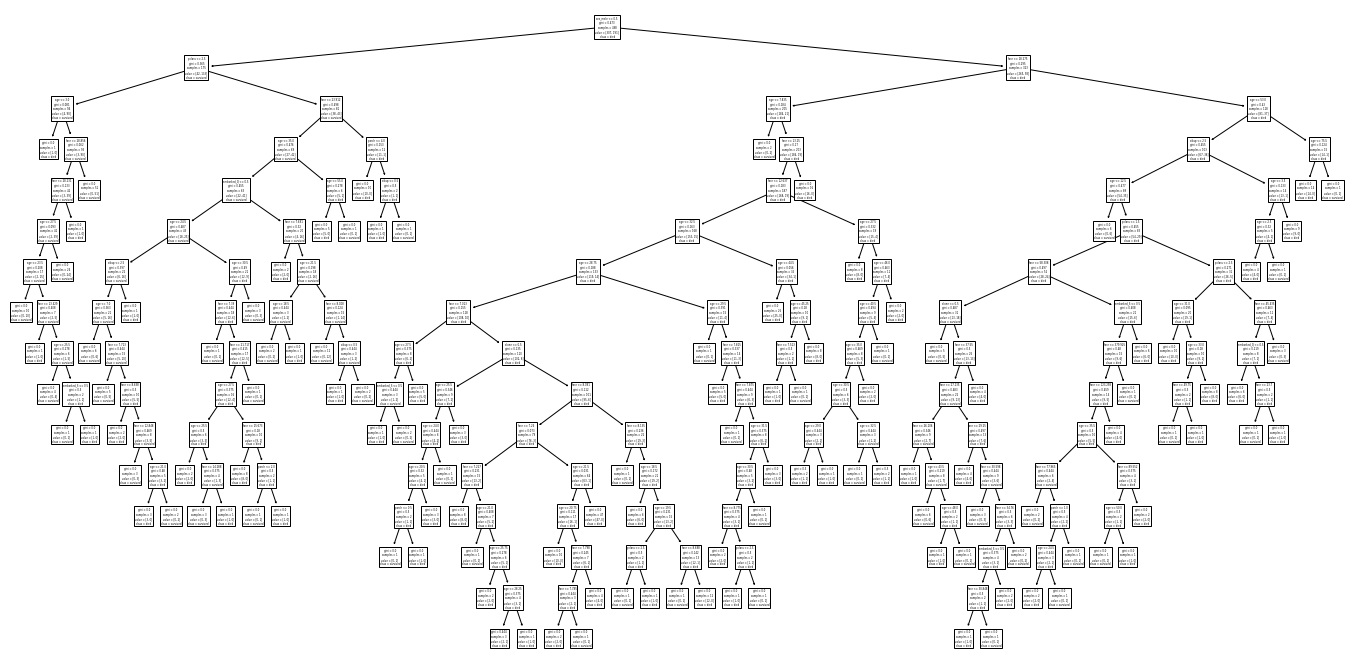

In [27]:

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(
    model,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [29]:
#as the difference between train and validate is big. I will use  max_features and max_depth
#when score.train > score.validate means overfit

In [30]:
# create the model
model1 = DecisionTreeClassifier(max_depth=3, max_features=3)
# fit the model
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3)

In [31]:
# look at the model scores for training set and validate set
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 81.53%
validate score: 78.04%


[Text(669.6, 570.7800000000001, 'embarked_S <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(334.8, 407.70000000000005, 'fare <= 45.54\ngini = 0.5\nsamples = 143\nvalue = [71, 72]\nclass = survived'),
 Text(167.4, 244.62, 'sex_male <= 0.5\ngini = 0.478\nsamples = 99\nvalue = [60, 39]\nclass = died'),
 Text(83.7, 81.53999999999996, 'gini = 0.375\nsamples = 40\nvalue = [10, 30]\nclass = survived'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.259\nsamples = 59\nvalue = [50, 9]\nclass = died'),
 Text(502.20000000000005, 244.62, 'age <= 65.5\ngini = 0.375\nsamples = 44\nvalue = [11, 33]\nclass = survived'),
 Text(418.5, 81.53999999999996, 'gini = 0.357\nsamples = 43\nvalue = [10, 33]\nclass = survived'),
 Text(585.9, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = died'),
 Text(1004.4000000000001, 407.70000000000005, 'sex_male <= 0.5\ngini = 0.446\nsamples = 355\nvalue = [236, 119]\nclass = died'),
 Text(837.0, 244.62, 'sibsp <= 

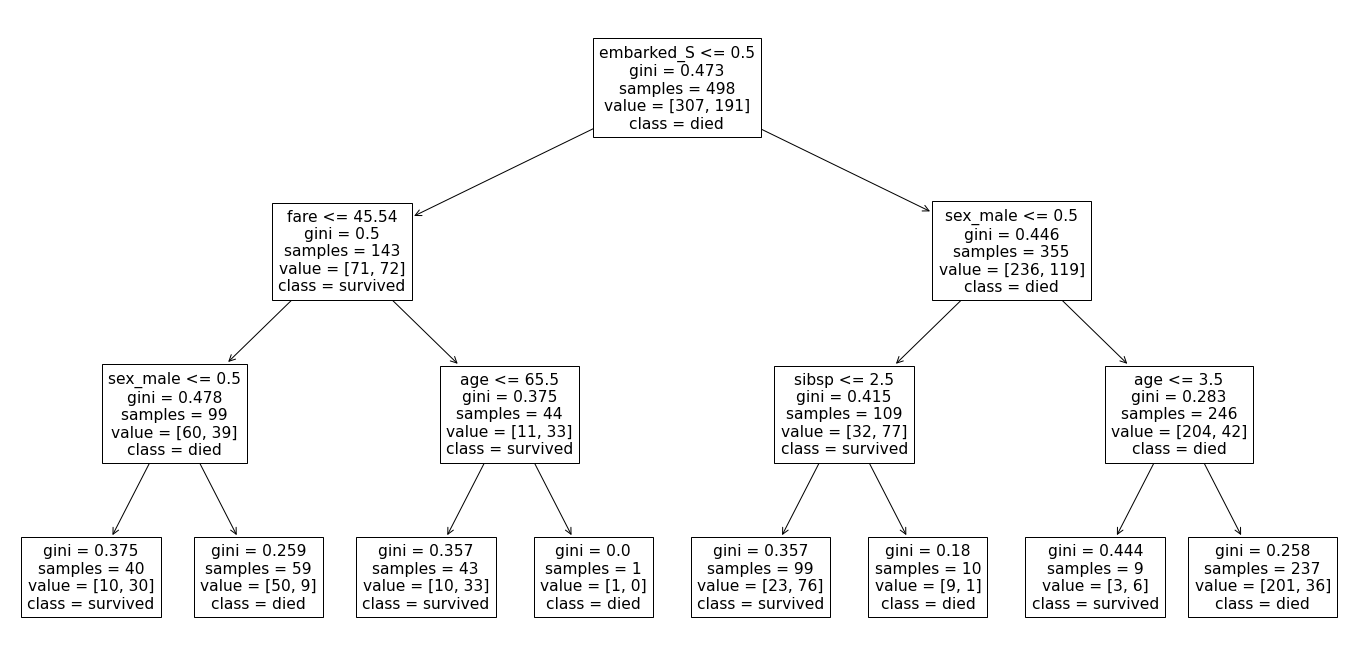

In [32]:

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(
    model1,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [33]:
#prediction based on our model1
prediction = model1.predict(X_train)

In [52]:
prediction

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [53]:
pd.Series(prediction).value_counts()

0    310
1    188
dtype: int64

In [34]:
#confusion matrix
conf_m = confusion_matrix(y_train, prediction )
conf_m

array([[261,  46],
       [ 46, 145]])

In [35]:
#check if rows or columns have the actual number. in this case rows has the actual number
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [36]:
 #just to see
mat =  pd.DataFrame ((confusion_matrix(y_train, prediction )),index = ['actual_dead','actual_survived'], columns =['pred_dead','pred_survived' ])
mat

,pred_dead,pred_survived
actual_dead,261,46
actual_survived,46,145


In [37]:
rubric_df = pd.DataFrame([['True Negative', 'False positive'], ['False Negative', 'True Positive']], columns=mat.columns, index=mat.index)
rubric_df

,pred_dead,pred_survived
actual_dead,True Negative,False positive
actual_survived,False Negative,True Positive


In [38]:
rubric_df + ': ' + mat.values.astype(str)

,pred_dead,pred_survived
actual_dead,True Negative: 261,False positive: 46
actual_survived,False Negative: 46,True Positive: 145


In [39]:
conf_m

array([[261,  46],
       [ 46, 145]])

In [40]:
conf_m[0,0]

261

positive = survived

these calculate the rates
- tpr = tp/(tp+fn)
- fpr = fp/(fp+tn)
- tnr = tn/(tn+fp)
- fnr = fn/(fn+tp)

https://en.wikipedia.org/wiki/Confusion_matrix

In [41]:
#assign the values
tp = conf_m[1,1]
fp =conf_m[0,1] 
fn= conf_m[1,0]
tn =conf_m[0,0]

In [42]:
#calculate the rate
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

In [43]:
#     matrix = confusion_matrix(y, model.predict(X))
#     tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
#     fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
#     tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
#     fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])

In [44]:
#calculate the accuracy
acc = model1.score(X_train, y_train)
acc

0.8152610441767069

In [45]:
print(f'''
The accuracy for our model is {acc:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')


The accuracy for our model is 0.8153
The True Positive Rate is 0.759, The False Positive Rate is 0.15,
The True Negative Rate is 0.85, and the False Negative Rate is 0.241



In [46]:
#classification report
clas_rep =pd.DataFrame(classification_report(y_train, prediction, output_dict=True)).T
clas_rep

,precision,recall,f1-score,support
0,0.850163,0.850163,0.850163,307.000000
1,0.759162,0.759162,0.759162,191.000000
accuracy,0.815261,0.815261,0.815261,0.815261
macro avg,0.804663,0.804663,0.804663,498.000000
weighted avg,0.815261,0.815261,0.815261,498.000000


In [108]:
pd.Series(dict(zip(X_train.columns, model1.feature_importances_)))

pclass        0.000000
age           0.065516
sibsp         0.092325
parch         0.000000
fare          0.088060
alone         0.000000
embarked_Q    0.000000
embarked_S    0.065827
sex_male      0.688272
dtype: float64

**********************

## other models

In [ ]:
model11 = DecisionTreeClassifier(max_depth=3, max_features= 4)
model11.fit(X_train, y_train)
print(f'training score: {model11.score(X_train, y_train):.2%}')


In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(
    model11,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [ ]:
pd.Series(dict(zip(X_train.columns, model11.feature_importances_)))

In [ ]:

model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)

print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

In [ ]:
# we want traning score < validate score.
# an aceptable range is a diff of 5%

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(
    model2,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [ ]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
# ****************compute metrics on the TRAIN set

In [47]:
#prediction based on our model
prediction = model.predict(X_train)

In [48]:
prediction

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [49]:
# check out the values in the predictions. we cannot use value_counts in array thats whay we conver it to pd.series
pd.Series(prediction).value_counts()

0    310
1    188
dtype: int64

In [54]:
#model Score: Accuracy

acc = model1.score(X_train, y_train)
acc

0.8152610441767069

In [55]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male
583,0,1,36.0,0,0,40.125,1,0,0,1


In [56]:
#these are the actual numbers
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [57]:
#check if you change the order of labels

In [58]:
confusion_matrix(y_train, prediction)

array([[307,   0],
       [  3, 188]])

In [59]:
confusion_matrix(y_train, prediction, labels=(1, 0) ) 

array([[188,   3],
       [  0, 307]])

In [60]:
confusion_matrix(y_train, prediction, labels=(0, 1) )#this is the default

array([[307,   0],
       [  3, 188]])

In [61]:
#the rows are the actual dead  because 0 + 307 = 307, 
confusion_matrix(y_train, prediction)

array([[307,   0],
       [  3, 188]])

In [62]:
cm= pd.DataFrame ((confusion_matrix(y_train, prediction )),index = ['actual_dead','actual_survived'], columns =['pred_dead','pred_survived' ])

In [63]:
cm

,pred_dead,pred_survived
actual_dead,307,0
actual_survived,3,188


In [64]:
#model Score: Accuracy

acc = model1.score(X_train, y_train)
acc

0.8152610441767069

In [65]:
pd.DataFrame(classification_report(y_train, prediction, output_dict=True)).T

,precision,recall,f1-score,support
0,0.990323,1.000000,0.995138,307.000000
1,1.000000,0.984293,0.992084,191.000000
accuracy,0.993976,0.993976,0.993976,0.993976
macro avg,0.995161,0.992147,0.993611,498.000000
weighted avg,0.994034,0.993976,0.993967,498.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
#### on the validate set *****


positive is : survived
True Positive: predict survived and it is survived
True Negative: predict death and it is death
False Positive: predict survived and it is death
False Negative: predict death and it is survived

In [66]:
# print the model score on the validate set
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

validate score: 78.04%


In [69]:
val_pred = model1.predict(X_validate)

In [70]:
# run classification report for model 1 on validate set
model1_class_report = 
print(model1_class_report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       132
           1       0.72      0.71      0.71        82

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



In [71]:
validate.survived.value_counts()

0    132
1     82
Name: survived, dtype: int64

In [74]:
confusion_matrix(validate.survived, val_pred)

array([[109,  23],
       [ 24,  58]])

In [84]:
cm2= confusion_matrix(y_validate, val_pred)

In [85]:
#just to see
pd.DataFrame (confusion_matrix(y_validate, val_pred),index = ['actual_death','actual_survived'], columns =['pred_death','pred_survived' ] )

,pred_death,pred_survived
actual_death,109,23
actual_survived,24,58


In [86]:
#psitive : survived
#assign the values
tp = cm2[1,1]
fp =cm2[0,1] 
fn= cm2[1,0]
tn =cm2[0,0]

In [87]:
#calculate the rate
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

In [88]:
print(f'''

The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')



The True Positive Rate is 0.707, The False Positive Rate is 0.174,
The True Negative Rate is 0.826, and the False Negative Rate is 0.293



In [95]:
#accuracy
acc_model1 =accuracy_score(y_validate, val_pred)
acc_model1

0.780373831775701

In [96]:
#precision
prec_model1= precision_score(y_validate, val_pred, pos_label = 1 )
prec_model1

0.7160493827160493

In [97]:
#recall
rec_model1= recall_score(y_validate, val_pred, pos_label = 1 )
rec_model1

0.7073170731707317

In [100]:
df = pd.DataFrame(classification_report(y_validate, val_pred, output_dict= True))
df

,0,1,accuracy,macro avg,weighted avg
precision,0.819549,0.716049,0.780374,0.767799,0.779890
recall,0.825758,0.707317,0.780374,0.766537,0.780374
f1-score,0.822642,0.711656,0.780374,0.767149,0.780115
support,132.000000,82.000000,0.780374,214.000000,214.000000


In [103]:
df.rename(columns={'0': "dead", '1': "survived"}, inplace = True)

In [104]:
df.T

,precision,recall,f1-score,support
dead,0.819549,0.825758,0.822642,132.000000
survived,0.716049,0.707317,0.711656,82.000000
accuracy,0.780374,0.780374,0.780374,0.780374
macro avg,0.767799,0.766537,0.767149,214.000000
weighted avg,0.779890,0.780374,0.780115,214.000000


### 5. Run through steps 2-4 using a different max_depth value.

In [110]:

model2 = DecisionTreeClassifier(max_depth=2)
model2.fit(X_train, y_train)

print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

training score: 79.92%
validate score: 76.17%


[Text(669.6, 570.7800000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(334.8, 407.70000000000005, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = survived'),
 Text(167.4, 244.62, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = survived'),
 Text(83.7, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = died'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = survived'),
 Text(502.20000000000005, 244.62, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = survived'),
 Text(418.5, 81.53999999999996, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = survived'),
 Text(585.9, 81.53999999999996, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = died'),
 Text(1004.4000000000001, 407.70000000000005, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = died'),
 Text(837.0, 244.62, 'age <= 7.8

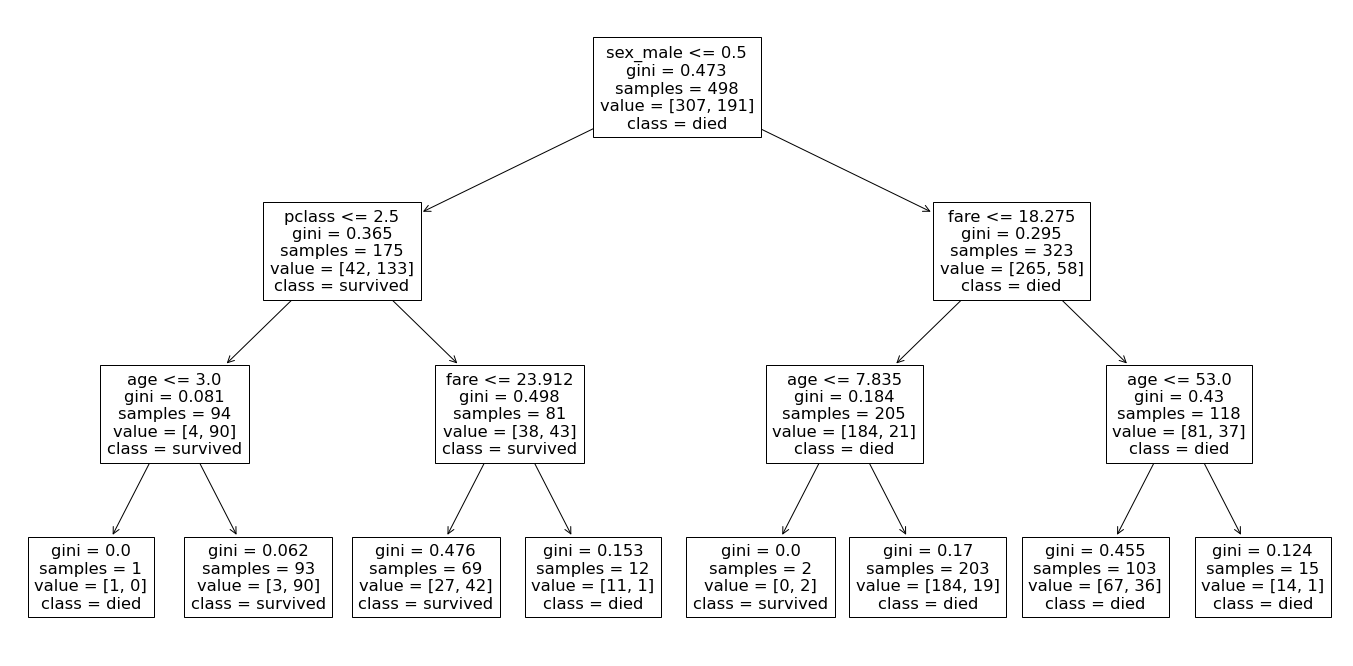

In [106]:

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plot_tree(
    model2,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

In [107]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

pclass        0.141589
age           0.064401
sibsp         0.000000
parch         0.000000
fare          0.110152
alone         0.000000
embarked_Q    0.000000
embarked_S    0.000000
sex_male      0.683858
dtype: float64

In [ ]:
#model Score
print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

In [ ]:
#add my prediction columns to train 
train['prediction_2'] = model2.predict(X_train)


In [ ]:
train.head()

In [ ]:
#these are the actual numbers
train.survived.value_counts()

In [ ]:
#these are the prediction_2 numbers
train.prediction_2.value_counts()

In [ ]:
#the rows are the actua because 261 + 46 = 307, 
confusion_matrix(train.survived, train.prediction_2, labels=(0, 1) )

In [ ]:
cm2= pd.DataFrame ((confusion_matrix(train.survived, train.prediction_2, labels=(0, 1))),index = ['actual_death','actual_survived'], columns =['pred_death','pred_survived' ] )

In [ ]:
cm2

In [ ]:
df2=pd.DataFrame(classification_report(train.survived, train.prediction_2,output_dict=True))
df2

In [ ]:
#accuracy
acc_model2 =accuracy_score(train.survived, train.prediction_2)

In [ ]:
#precision
prec_model2 =precision_score(train.survived, train.prediction_2, pos_label = 1 )

In [ ]:
#recall
rec_model2= recall_score(train.survived, train.prediction_2, pos_label = 1 )

### 6. Which model performs better on your in-sample data?

In [ ]:
acc_model1, prec_model1, rec_model1

In [ ]:
acc_model2, prec_model2, rec_model2


### 7.Which model performs best on your out-of-sample data, the validate set?

In [ ]:
validate.shape

In [ ]:
train.shape

In [ ]:
#accuracy
acc_model2 =accuracy_score(validate.survived, train.prediction_2)

In [ ]:
#precision
prec_model2 =precision_score(validate.survived, train.prediction_2, pos_label = 1 )

In [ ]:
#recall
rec_model2= recall_score(validate.survived, train.prediction_2, pos_label = 1 )

# Random Forest

In [ ]:
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?